In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)
plt.style.use('seaborn-v0_8-whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [ ]:
path = '../home-credit-default-risk/'

bureau = pd.read_csv(path + 'bureau.csv')
bureau_balance = pd.read_csv(path + 'bureau_balance.csv')

print(f"Bureau shape: {bureau.shape}")
print(f"Bureau Balance shape: {bureau_balance.shape}")

Bureau shape: (1716428, 17)
Bureau Balance shape: (27299925, 3)


# Bureau Dataset

## Basic info

In [3]:
print(f"Shape: {bureau.shape}")
print(f"Number of rows: {bureau.shape[0]:,}")
print(f"Number of columns: {bureau.shape[1]}")
print(f"Unique clients (SK_ID_CURR): {bureau['SK_ID_CURR'].nunique():,}")
print(f"Unique bureau records (SK_ID_BUREAU): {bureau['SK_ID_BUREAU'].nunique():,}")

Shape: (1716428, 17)
Number of rows: 1,716,428
Number of columns: 17
Unique clients (SK_ID_CURR): 305,811
Unique bureau records (SK_ID_BUREAU): 1,716,428


In [4]:
bureau.head(5)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [5]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [6]:
bureau.describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


## Missing values

In [7]:
missing_count = bureau.isnull().sum()
missing_percentage = (missing_count / len(bureau)) * 100

missing_df = pd.DataFrame({
    'Total missing': missing_count,
    'Percent': missing_percentage
})

missing_df = missing_df[missing_df['Total missing'] > 0].sort_values('Percent', ascending=False)
missing_df

,Total missing,Percent
AMT_ANNUITY,1226791,71.473490
AMT_CREDIT_MAX_OVERDUE,1124488,65.513264
DAYS_ENDDATE_FACT,633653,36.916958
AMT_CREDIT_SUM_LIMIT,591780,34.477415
AMT_CREDIT_SUM_DEBT,257669,15.011932
DAYS_CREDIT_ENDDATE,105553,6.149573
AMT_CREDIT_SUM,13,0.000757


## Variable distributions

### numerical cols

In [8]:
numerical_cols = bureau.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in ['SK_ID_CURR', 'SK_ID_BUREAU']]

print(f"number of numerical columns: {len(numerical_cols)}")

number of numerical columns: 12


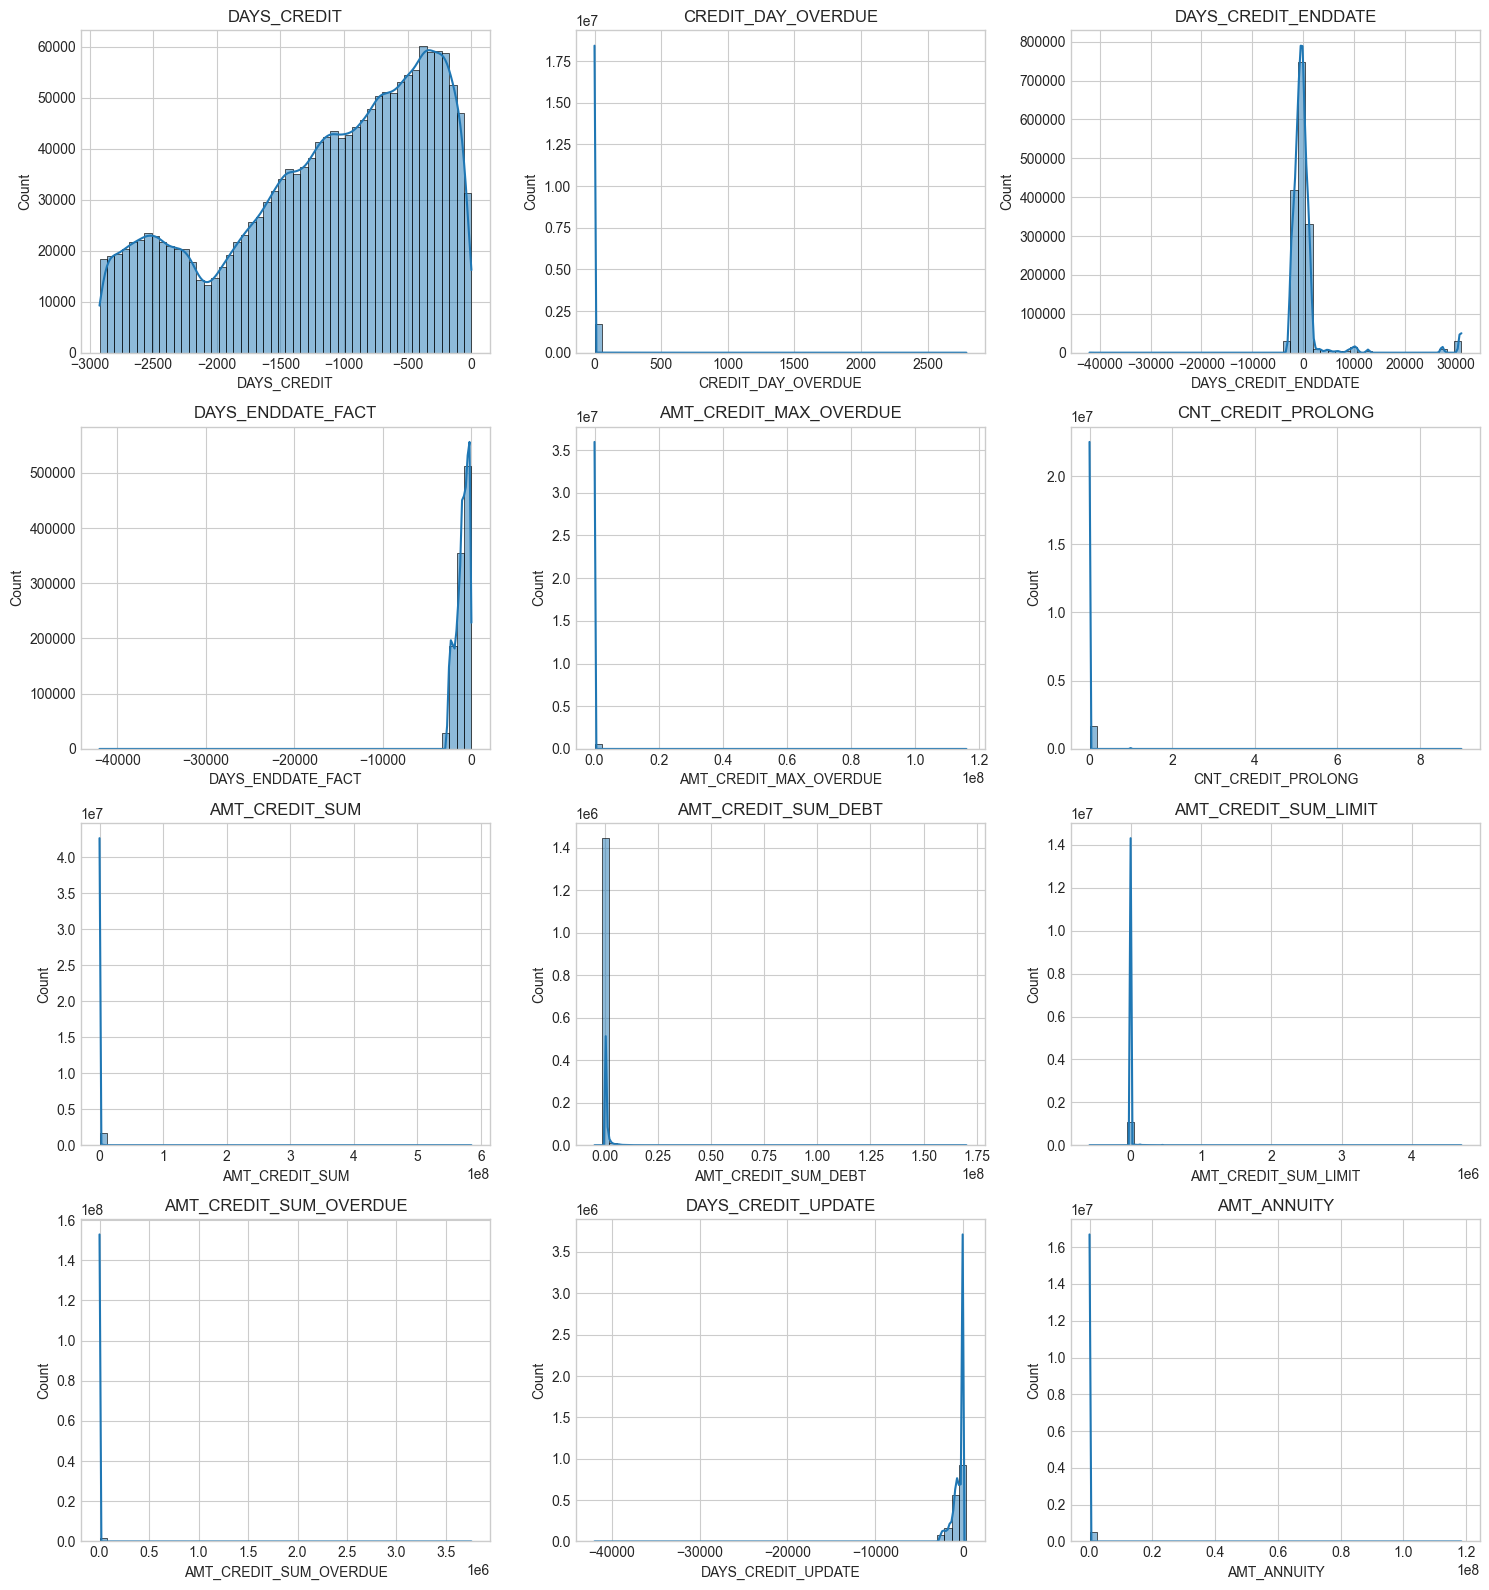

In [9]:
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(data=bureau, x=col, bins=50, ax=axes[i], kde=True)
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

### Categorical cols

In [10]:
categorical_cols = bureau.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {categorical_cols}")
print()

for col in categorical_cols:
    print(bureau[col].value_counts())
    print()

Categorical columns: ['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE']

CREDIT_ACTIVE
Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: count, dtype: int64

CREDIT_CURRENCY
currency 1    1715020
currency 2       1224
currency 3        174
currency 4         10
Name: count, dtype: int64

CREDIT_TYPE
Consumer credit                                 1251615
Credit card                                      402195
Car loan                                          27690
Mortgage                                          18391
Microloan                                         12413
Loan for business development                      1975
Another type of loan                               1017
Unknown type of loan                                555
Loan for working capital replenishment              469
Cash loan (non-earmarked)                            56
Real estate loan                                     27
Loan for the purchase of equipment            

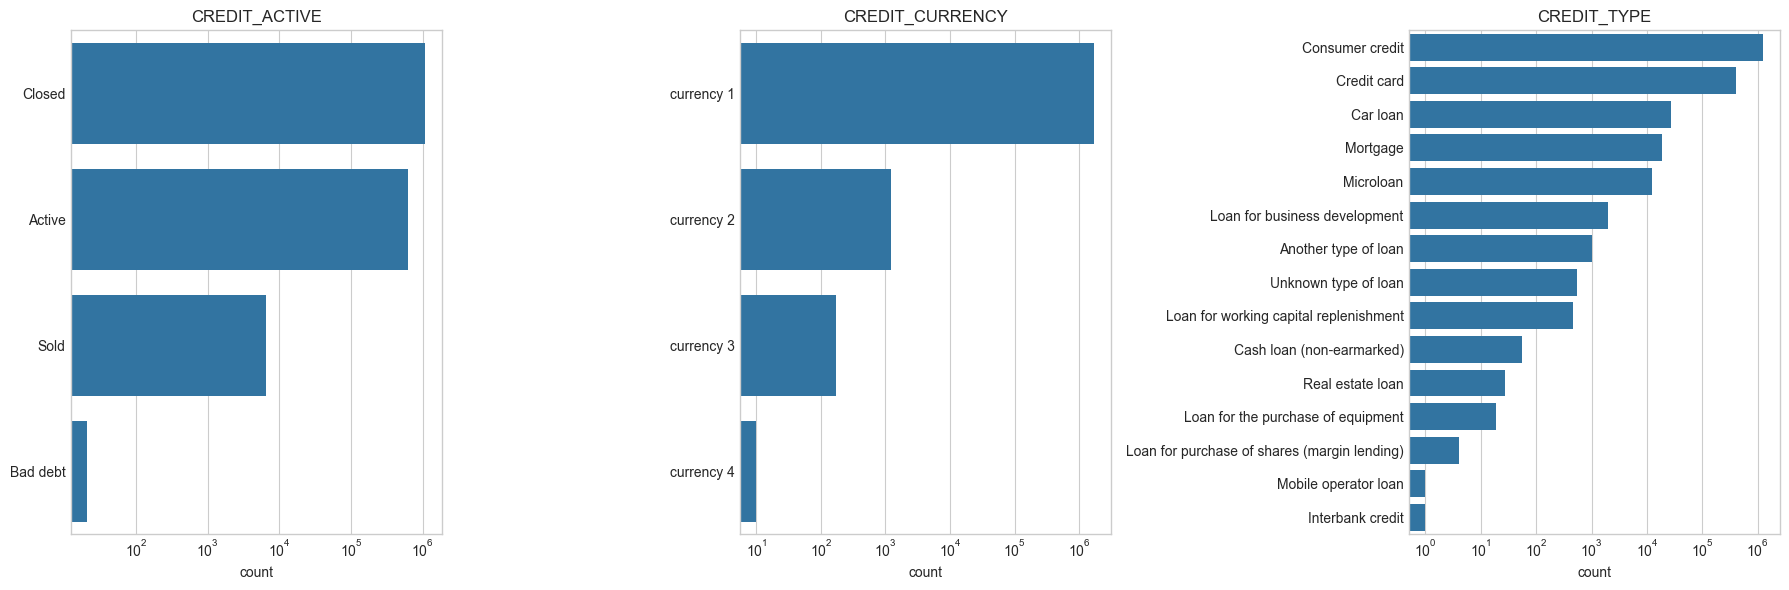

In [11]:
fig, axes = plt.subplots(1, len(categorical_cols), figsize=(6 * len(categorical_cols), 6))

if len(categorical_cols) == 1:
    axes = [axes]

for i, col in enumerate(categorical_cols):
    sns.countplot(data=bureau, y=col, ax=axes[i], order=bureau[col].value_counts().index)
    axes[i].set_title(col)
    axes[i].set_ylabel('')
    axes[i].set_xscale('log')
plt.tight_layout()
plt.show()

## Correlations

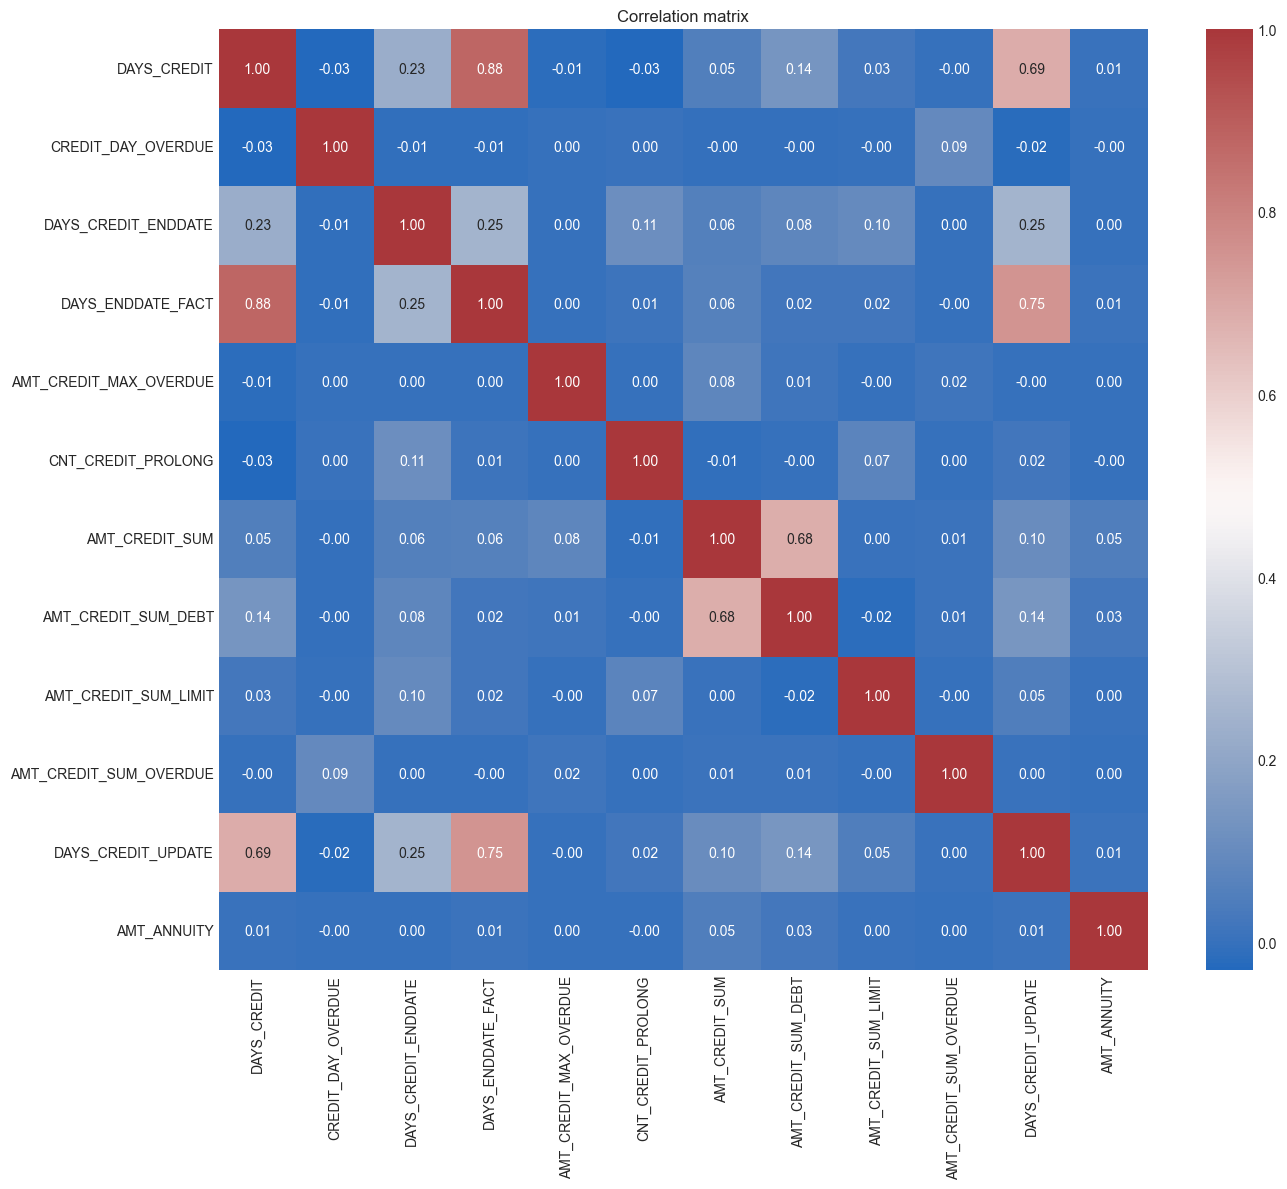

In [12]:
corr_cols = [col for col in numerical_cols if bureau[col].notna().sum() > 0]
correlation_matrix = bureau[corr_cols].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='vlag')
plt.title('Correlation matrix')
plt.tight_layout()
plt.show()

In [13]:
corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        corr_pairs.append({
            'Feature 1': correlation_matrix.columns[i],
            'Feature 2': correlation_matrix.columns[j],
            'Correlation': correlation_matrix.iloc[i, j]
        })

corr_df = pd.DataFrame(corr_pairs)
corr_df['Abs Correlation'] = corr_df['Correlation'].abs()
corr_df = corr_df.sort_values('Abs Correlation', ascending=False)

print("Top 15 correlations:")
corr_df.head(15)

Top 15 correlations:


,Feature 1,Feature 2,Correlation,Abs Correlation
2,DAYS_CREDIT,DAYS_ENDDATE_FACT,0.875359,0.875359
36,DAYS_ENDDATE_FACT,DAYS_CREDIT_UPDATE,0.751294,0.751294
9,DAYS_CREDIT,DAYS_CREDIT_UPDATE,0.688771,0.688771
51,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,0.683419,0.683419
21,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,0.248825,0.248825
28,DAYS_CREDIT_ENDDATE,DAYS_CREDIT_UPDATE,0.248525,0.248525
1,DAYS_CREDIT,DAYS_CREDIT_ENDDATE,0.225682,0.225682
58,AMT_CREDIT_SUM_DEBT,DAYS_CREDIT_UPDATE,0.141235,0.141235
6,DAYS_CREDIT,AMT_CREDIT_SUM_DEBT,0.135397,0.135397
23,DAYS_CREDIT_ENDDATE,CNT_CREDIT_PROLONG,0.113683,0.113683


## Outliers

In [ ]:
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((series < lower) | (series > upper)).sum()
    return outliers, outliers / len(series) * 100

outlier_stats = []
for col in numerical_cols:
    count, percentage = count_outliers(bureau[col].dropna())
    outlier_stats.append({'Column': col, 'Outliers count': count, 'Outliers %': round(percentage, 2)})

outlier_df = pd.DataFrame(outlier_stats).sort_values('Outliers %', ascending=False)
outlier_df

,Column,Outliers count,Outliers %
4,AMT_CREDIT_MAX_OVERDUE,121290,20.49
7,AMT_CREDIT_SUM_DEBT,280455,19.23
6,AMT_CREDIT_SUM,187998,10.95
11,AMT_ANNUITY,43918,8.97
8,AMT_CREDIT_SUM_LIMIT,74506,6.62
2,DAYS_CREDIT_ENDDATE,79340,4.93
10,DAYS_CREDIT_UPDATE,63755,3.71
5,CNT_CREDIT_PROLONG,9114,0.53
1,CREDIT_DAY_OVERDUE,4217,0.25
9,AMT_CREDIT_SUM_OVERDUE,4158,0.24


I don't think that we want to get rid of outliers because perhaps it leads us to better prediction as someone who is outlier might not pay the bills on time

## Client Analysis

In [15]:
credits_per_client = bureau.groupby('SK_ID_CURR').size()

print(f"Credits per client statistics:")
print(credits_per_client.describe())

Credits per client statistics:
count    305811.000000
mean          5.612709
std           4.430354
min           1.000000
25%           2.000000
50%           4.000000
75%           8.000000
max         116.000000
dtype: float64


Each client has about 5 credits - interesting...

# Bureau Balance

## Basic information

In [16]:
print(f"Number of rows: {bureau_balance.shape[0]:,}")
print(f"Number of columns: {bureau_balance.shape[1]}")
print(f"Unique bureau records (SK_ID_BUREAU): {bureau_balance['SK_ID_BUREAU'].nunique():,}")

Number of rows: 27,299,925
Number of columns: 3
Unique bureau records (SK_ID_BUREAU): 817,395


In [17]:
bureau_balance.head(5)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [18]:
bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [19]:
bureau_balance.describe()

,SK_ID_BUREAU,MONTHS_BALANCE
count,2.729992e+07,2.729992e+07
mean,6.036297e+06,-3.074169e+01
std,4.923489e+05,2.386451e+01
min,5.001709e+06,-9.600000e+01
25%,5.730933e+06,-4.600000e+01
50%,6.070821e+06,-2.500000e+01
75%,6.431951e+06,-1.100000e+01
max,6.842888e+06,0.000000e+00


## Missing values

In [20]:
missing_bb = bureau_balance.isnull().sum()
missing_percentage_bb = (missing_bb / len(bureau_balance)) * 100

missing_df_bb = pd.DataFrame({
    'Total missing': missing_bb,
    'Percent': missing_percentage_bb
})

missing_df_bb.sort_values('Percent', ascending=False)

,Total missing,Percent
SK_ID_BUREAU,0,0.0
MONTHS_BALANCE,0,0.0
STATUS,0,0.0


## Variable distributions

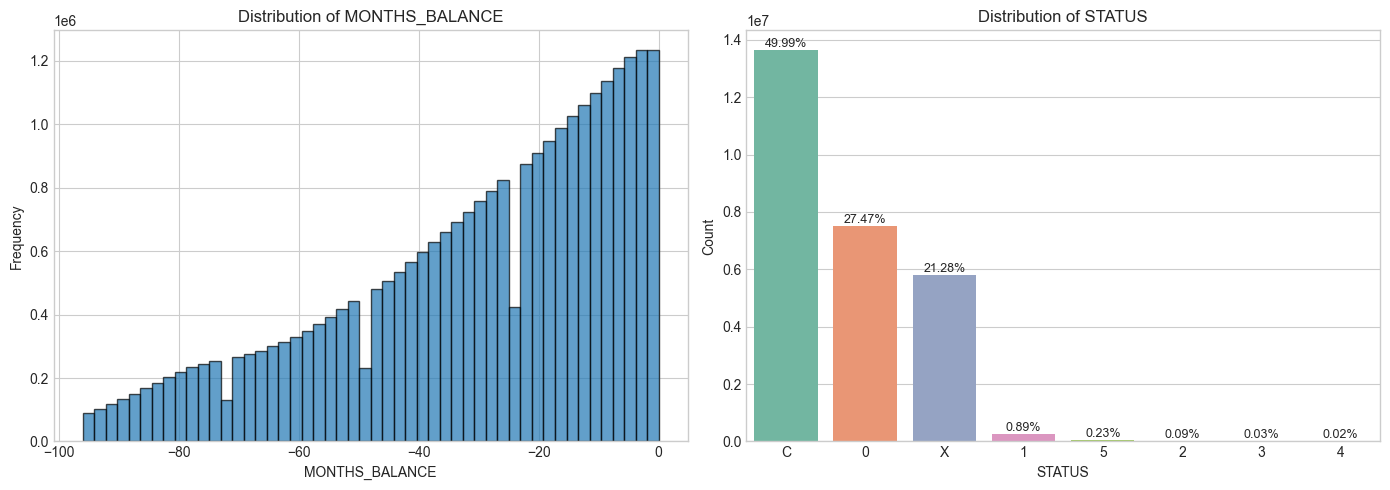

In [21]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(bureau_balance['MONTHS_BALANCE'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('MONTHS_BALANCE')
plt.ylabel('Frequency')
plt.title('Distribution of MONTHS_BALANCE')

plt.subplot(1, 2, 2)
status_counts = bureau_balance['STATUS'].value_counts()
total = status_counts.sum()
ax = sns.barplot(x=status_counts.index, y=status_counts.values, hue=status_counts.index, legend=False, palette='Set2')
plt.xlabel('STATUS')
plt.ylabel('Count')
plt.title('Distribution of STATUS')

for i, (count, status) in enumerate(zip(status_counts.values, status_counts.index)):
    percent = count / total * 100
    ax.text(i, count, f'{percent:.2f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Table Relationships

In [22]:
bureau_ids_in_bureau = set(bureau['SK_ID_BUREAU'].unique())
bureau_ids_in_balance = set(bureau_balance['SK_ID_BUREAU'].unique())

print(f"Unique SK_ID_BUREAU in bureau: {len(bureau_ids_in_bureau):,}")
print(f"Unique SK_ID_BUREAU in bureau_balance: {len(bureau_ids_in_balance):,}")
print()
print(f"Bureau IDs in both tables: {len(bureau_ids_in_bureau & bureau_ids_in_balance):,}")
print(f"Bureau IDs only in bureau: {len(bureau_ids_in_bureau - bureau_ids_in_balance):,}")
print(f"Bureau IDs only in bureau_balance: {len(bureau_ids_in_balance - bureau_ids_in_bureau):,}")

Unique SK_ID_BUREAU in bureau: 1,716,428
Unique SK_ID_BUREAU in bureau_balance: 817,395

Bureau IDs in both tables: 774,354
Bureau IDs only in bureau: 942,074
Bureau IDs only in bureau_balance: 43,041


We have detailed monthly history for 774k credits. 

For 942k credits we only have summary info from bureau without monthly information. 

43k bureau_balance records are refering to non-existent credits